# GSEA

In [217]:
# if (!require("BiocManager", quietly = TRUE))
#     install.packages("BiocManager")
# BiocManager::install("TCGAbiolinks")

# if (!require("BiocManager", quietly = TRUE))
#     install.packages("BiocManager")
# BiocManager::install("clusterProfiler")

# if (!require("BiocManager", quietly = TRUE))
#     install.packages("BiocManager")
# BiocManager::install("AnnotationDbi")

# if (!require("BiocManager", quietly = TRUE))
#     install.packages("BiocManager")
# BiocManager::install("org.Hs.eg.db")

In [194]:
library(clusterProfiler)
library(org.Hs.eg.db)
library(AnnotationDbi)
library(EnhancedVolcano)
library(ggplot2)



## i used the DE result from Amanda's work directly 

In [168]:
DE_results<- read_csv('/kaggle/input/sig-genes/DE_results.csv')

New names:
• `` -> `...1`
Rows: 14890 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): ...1, Ensembl_ID
dbl (5): logFC, logCPM, LR, PValue, FDR

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [169]:
head(DE_results)

...1  Ensembl_ID      logFC       logCPM   LR           PValue      
1 DPM1  ENSG00000000419 -0.02249845 4.725019  0.007006651 9.332904e-01
2 SCYL3 ENSG00000000457 -0.25328103 2.736575  0.802484855 3.703515e-01
3 FIRRM ENSG00000000460 -0.02328614 3.422434  0.004370409 9.472910e-01
4 FGR   ENSG00000000938  1.48266442 4.252300  5.872023043 1.538336e-02
5 CFH   ENSG00000000971 -3.38380212 2.255220 18.767134523 1.476904e-05
6 FUCA2 ENSG00000001036  1.50961356 1.760394 10.883264954 9.703704e-04
  FDR         
1 0.9544971720
2 0.4905313198
3 0.9641167628
4 0.0451526892
5 0.0002625646
6 0.0059199746

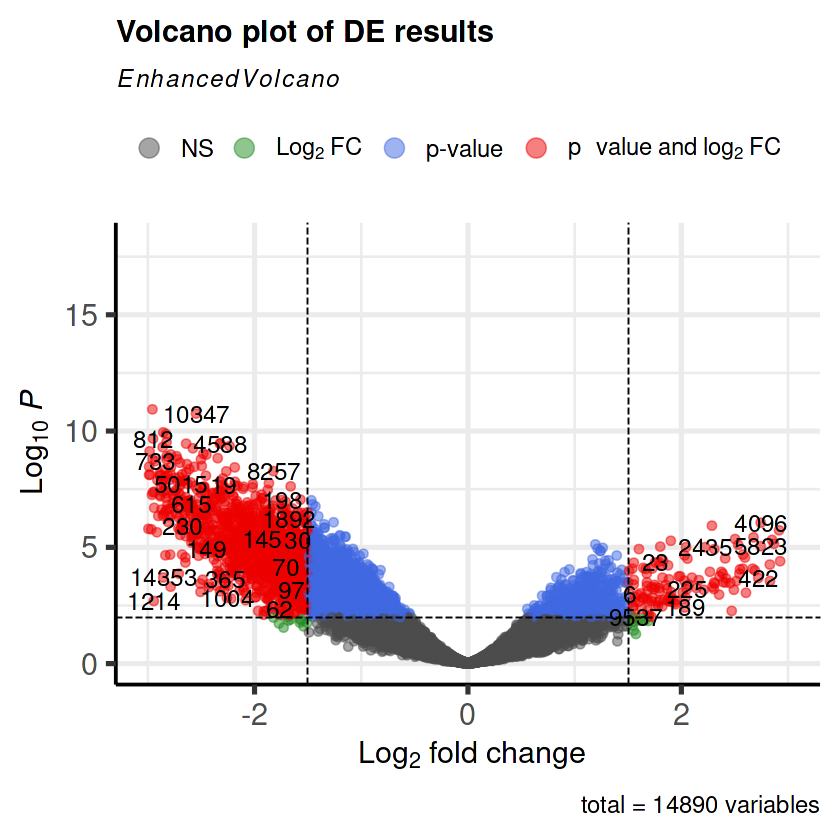

In [170]:
# i changed the P value cut of to be 0.001 for clarity
EnhancedVolcano(
  DE_results, 
  lab = rownames(DE_results), 
  x = 'logFC', 
  y = 'PValue', 
  pCutoff = 10e-3, 
  FCcutoff = 1.5, 
  title = 'Volcano plot of DE results',
  xlim = c(-3, 3) 
)


In [178]:
# extracting up-regulated genes 
UPgenes <-  DE_results %>%
  filter(logFC > 1.5 & FDR < 10e-3)
dim(UPgenes)


[1] 104   7

### there are 104 up regualted genes based on the filtering criteria 

In [179]:
# extractingdown-regulated genes 
downgenes <-  DE_results %>%
  filter(logFC < -1.5 & FDR < 10e-3)
dim(downgenes)


[1] 1305    7

### we have 1305downregulated genes 

In [180]:
# extracting gene names 
UPgenes_n <- UPgenes['Ensembl_ID']# the Ensembl_ID corresponds to the coulmn name of the genes ID
downgenes_n <-downgenes['Ensembl_ID'] 


In [181]:
# Check for missing or duplicated values
any(is.na(downgenes_n$Ensembl_ID))   # Should return FALSE
any(duplicated(downgenes_n$Ensembl_ID))  # Should return FALSE

[1] FALSE

[1] TRUE

In [182]:
# Check for missing or duplicated values
any(is.na(UPgenes_n$Ensembl_ID))   
any(duplicated(UPgenes_n$Ensembl_ID)) 

[1] FALSE

[1] FALSE

In [183]:
# removing dublucated names
downgenes_n <-downgenes_n[!duplicated(downgenes_n), ]# here we need to remove dublicated gene ENSEBML ID
# extracting the genes ID
downgenes_n <- as.vector(downgenes_n$Ensembl_ID)
UPgenes_n <- as.vector(UPgenes_n$Ensembl_ID)

In [184]:
GO_result_up<- enrichGO(gene= UPgenes_n,
                        OrgDb= 'org.Hs.eg.db', #Hs for human annotation 
                       keyType = 'ENSEMBL', # i used the ENSEBML gene ID
                       ont= 'Bp' ) # for biological processes

In [185]:
as.data.frame(GO_result_up) #looking at what we have

ID        
GO:0030593 GO:0030593
GO:0045807 GO:0045807
GO:0071621 GO:0071621
GO:1990266 GO:1990266
GO:0050766 GO:0050766
GO:0097530 GO:0097530
GO:0006909 GO:0006909
GO:0050764 GO:0050764
GO:0030100 GO:0030100
GO:0030595 GO:0030595
GO:0097529 GO:0097529
GO:0032760 GO:0032760
GO:1903557 GO:1903557
GO:0002274 GO:0002274
GO:0050900 GO:0050900
GO:0060326 GO:0060326
GO:0042742 GO:0042742
GO:0002429 GO:0002429
GO:0006959 GO:0006959
GO:0050832 GO:0050832
GO:0006882 GO:0006882
GO:0071276 GO:0071276
GO:0009620 GO:0009620
GO:0032640 GO:0032640
GO:0032680 GO:0032680
GO:0001906 GO:0001906
GO:0071706 GO:0071706
GO:1903555 GO:1903555
GO:0097501 GO:0097501
GO:0061687 GO:0061687
⋮          ⋮         
GO:0002218 GO:0002218
GO:0010038 GO:0010038
GO:0071248 GO:0071248
GO:0042116 GO:0042116
GO:0006801 GO:0006801
GO:0090322 GO:0090322
GO:2000116 GO:2000116
GO:0002224 GO:0002224
GO:0030101 GO:0030101
GO:0052548 GO:0052548
GO:0071241 GO:0071241
GO:0019730 GO:0019730
GO:0072203 GO:0072203
GO:0034121 GO:0034121
GO:0045730 GO:0045730
GO:2000377 GO:2000377
GO:0051092 GO:0051092
GO:0098754 GO:0098754
GO:0031666 GO:0031666
GO:0052547 GO:0052547
GO:0018198 GO:0018198
GO:0010043 GO:0010043
GO:0032732 GO:0032732
GO:0051091 GO:0051091
GO:0001788 GO:0001788
GO:0002430 GO:0002430
GO:0070486 GO:0070486
GO:0009636 GO:0009636
GO:0001794 GO:0001794
GO:0002445 GO:0002445
           Description                                                                 
GO:0030593 neutrophil chemotaxis                                                       
GO:0045807 positive regulation of endocytosis                                          
GO:0071621 granulocyte chemotaxis                                                      
GO:1990266 neutrophil migration                                                        
GO:0050766 positive regulation of phagocytosis                                         
GO:0097530 granulocyte migration                                                       
GO:0006909 phagocytosis                                                                
GO:0050764 regulation of phagocytosis                                                  
GO:0030100 regulation of endocytosis                                                   
GO:0030595 leukocyte chemotaxis                                                        
GO:0097529 myeloid leukocyte migration                                                 
GO:0032760 positive regulation of tumor necrosis factor production                     
GO:1903557 positive regulation of tumor necrosis factor superfamily cytokine production
GO:0002274 myeloid leukocyte activation                                                
GO:0050900 leukocyte migration                                                         
GO:0060326 cell chemotaxis                                                             
GO:0042742 defense response to bacterium                                               
GO:0002429 immune response-activating cell surface receptor signaling pathway          
GO:0006959 humoral immune response                                                     
GO:0050832 defense response to fungus                                                  
GO:0006882 intracellular zinc ion homeostasis                                          
GO:0071276 cellular response to cadmium ion                                            
GO:0009620 response to fungus                                                          
GO:0032640 tumor necrosis factor production                                            
GO:0032680 regulation of tumor necrosis factor production                              
GO:0001906 cell killing                                                                
GO:0071706 tumor necrosis factor superfamily cytokine production                       
GO:1903555 regulation of tumor necrosis factor superfamily cytokine production         
GO:0097501 stress response to metal ion                                                
GO:0061

In [ ]:
GO_result_up

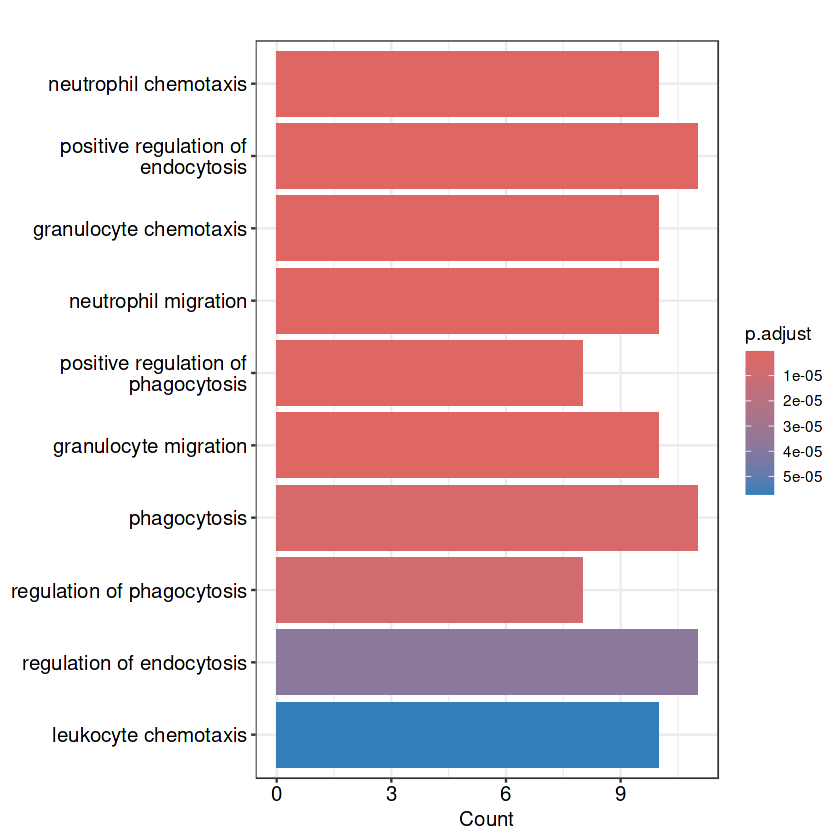

In [186]:
# dump plot
plot(barplot(GO_result_up, showCategory = 10))


In [187]:
GO_result_down<- enrichGO(gene=downgenes_n,
                        OrgDb= 'org.Hs.eg.db', #Hs for human annotation 
                       keyType = 'ENSEMBL', # i used the ENSEBML gene ID
                       ont= 'Bp' ) # for biological processes

In [188]:
as.data.frame(GO_result_down) #looking at what we have

ID         Description                                           
GO:0061644 GO:0061644 protein localization to CENP-A containing chromatin   
GO:0006334 GO:0006334 nucleosome assembly                                   
GO:0034728 GO:0034728 nucleosome organization                               
GO:0007018 GO:0007018 microtubule-based movement                            
GO:0071459 GO:0071459 protein localization to chromosome, centromeric region
GO:0071168 GO:0071168 protein localization to chromatin                     
GO:0045653 GO:0045653 negative regulation of megakaryocyte differentiation  
GO:0065004 GO:0065004 protein-DNA complex assembly                          
GO:0097553 GO:0097553 calcium ion transmembrane import into cytosol         
GO:0010970 GO:0010970 transport along microtubule                           
GO:0034502 GO:0034502 protein localization to chromosome                    
GO:0099111 GO:0099111 microtubule-based transport                           
GO:0051209 GO:0051209 release of sequestered calcium ion into cytosol       
GO:0051283 GO:0051283 negative regulation of sequestering of calcium ion    
GO:0051282 GO:0051282 regulation of sequestering of calcium ion             
GO:0051208 GO:0051208 sequestering of calcium ion                           
GO:0032200 GO:0032200 telomere organization                                 
GO:0045652 GO:0045652 regulation of megakaryocyte differentiation           
GO:0030705 GO:0030705 cytoskeleton-dependent intracellular transport        
GO:0014866 GO:0014866 skeletal myofibril assembly                           
GO:0051235 GO:0051235 maintenance of location                               
           GeneRatio BgRatio   RichFactor FoldEnrichment zScore    pvalue      
GO:0061644 10/594    18/21288  0.55555556 19.910213      13.598067 9.499009e-12
GO:0006334 21/594    138/21288 0.15217391  5.453667       8.892632 2.616498e-10
GO:0034728 22/594    160/21288 0.13750000  4.927778       8.449012 7.241369e-10
GO:0007018 35/594    449/21288 0.07795100  2.793638       6.508003 5.157262e-08
GO:0071459 10/594    42/21288  0.23809524  8.532949       8.279027 1.745535e-07
GO:0071168 12/594    67/21288  0.17910448  6.418815       7.526395 2.948855e-07
GO:0045653 7/594     20/21288  0.35000000 12.543434       8.750139 7.183847e-07
GO:0065004 24/594    273/21288 0.08791209  3.150627       6.059126 7.989421e-07
GO:0097553 18/594    197/21288 0.09137056  3.274573       5.433913 1.109975e-05
GO:0010970 17/594    179/21288 0.09497207  3.403645       5.471310 1.166488e-05
GO:0034502 15/594    146/21288 0.10273973  3.682026       5.509276 1.484668e-05
GO:0099111 19/594    221/21288 0.08597285  3.081128       5.268923 1.522266e-05
GO:0051209 14/594    136/21288 0.10294118  3.689245       5.330309 2.780428e-05
GO:0051283 14/594    137/21288 0.10218978  3.662317       5.296424 3.019039e-05
GO:0051282 14/594    139/21288 0.10071942  3.609621       5.229597 3.550736e-05
GO:0051208 14/594    143/21288 0.09790210  3.508653       5.099563 4.865289e-05
GO:0032200 18/594    221/21288 0.08144796  2.918963       4.858360 5.182886e-05
GO:0045652 7/594     38/21288  0.18421053  6.601808       5.855564 7.560734e-05
GO:0030705 17/594    216/21288 0.07870370  2.820614       4.556381 1.263697e-04
GO:0014866 4/594     11/21288  0.36363636 13.032140       6.762577 1.693793e-04
GO:0051235 23/594    358/21288 0.06424581  2.302466       4.210673 1.985337e-04
           p.adjust     qvalue      
GO:0061644 3.695114e-08 3.643620e-08
GO:0006334 5.089088e-07 5.018167e-07
GO:0034728 9.389641e-07 9.258789e-07
GO:0007018 5.015437e-05 4.945542e-05
GO:0071459 1.358027e-04 1.339101e-04
GO:0071168 1.911841e-04 1.885198e-04
GO:0045653 3.884856e-04 3.830717e-04
GO:0065004 3.884856e-04 3.830717e-04
GO:0097553 4.537639e-03 4.474403e-03
GO:0010970 4.537639e-03 4.474403e-03
GO:0034502 4.934680e-03 4.865911e-03
GO:0099111 4.934680e-03 4.865911e-03
GO:0051209 8.319896e-03 8.203951e-03
GO:0051283 8.388615e-03 8.271712e-03
GO

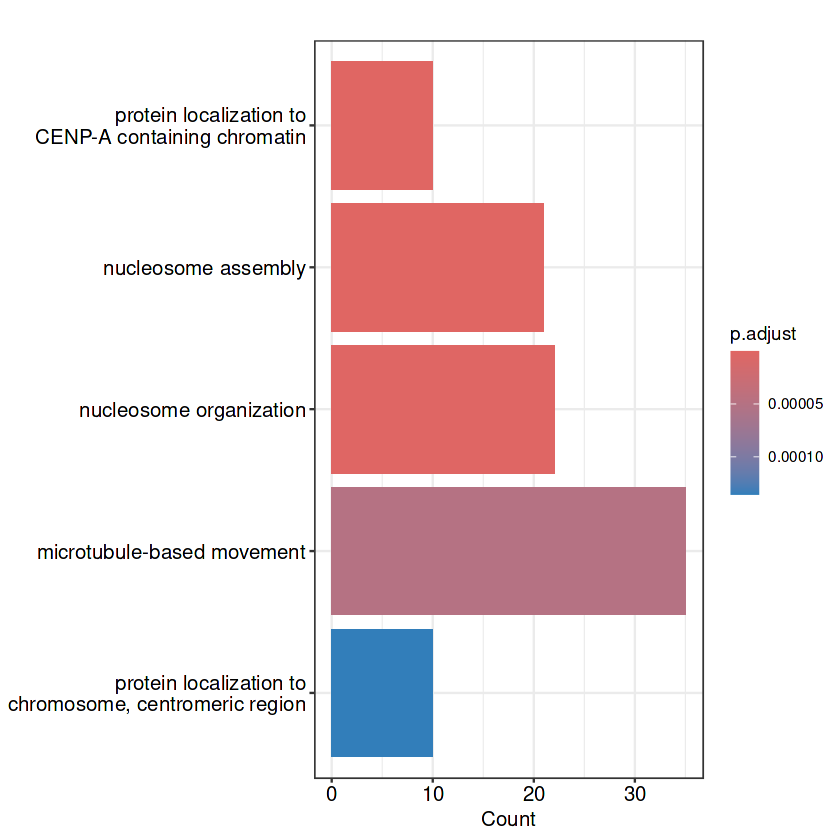

In [189]:
# dump plot
plot(barplot(GO_result_down, showCategory = 5))


# visualization of the result 

In [199]:
# GO_result_down
# GO_result_up

## visualziation of up genes

In [218]:
# if (!require("BiocManager", quietly = TRUE))
#     install.packages("BiocManager")

# BiocManager::install("DOSE")

In [203]:
modified_result_up<- filter(GO_result_up, p.adjust < .05, qvalue < 0.2) # filtering pathways

In [204]:
library(DOSE)
modified_result_up= mutate(modified_result_up, geneRatio = parse_ratio(GeneRatio)) %>% #converting to numeric value ratio 
  arrange(desc(geneRatio)) # sorting the dataframe

DOSE v3.30.5  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use DOSE in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Guang-Rong Yan, Qing-Yu He. DOSE: an R/Bioconductor package for Disease Ontology Semantic and Enrichment analysis. Bioinformatics 2015, 31(4):608-609




In [206]:
# k/M
# Calculate richFactor by dividing Count by the numerator of BgRatio
y <- mutate(modified_result_up, richFactor = Count / as.numeric(sub("/\\d+", "", BgRatio)))
y

#
# over-representation test
#
#...@organism 	 Homo sapiens 
#...@ontology 	 BP 
#...@keytype 	 ENSEMBL 
#...@gene 	 chr [1:104] "ENSG00000001036" "ENSG00000003147" "ENSG00000010610" ...
#...pvalues adjusted by 'BH' with cutoff <0.05 
#...66 enriched terms found
'data.frame':	66 obs. of  14 variables:
 $ ID            : chr  "GO:0045807" "GO:0006909" "GO:0030100" "GO:0050900" ...
 $ Description   : chr  "positive regulation of endocytosis" "phagocytosis" "regulation of endocytosis" "leukocyte migration" ...
 $ GeneRatio     : chr  "11/92" "11/92" "11/92" "11/92" ...
 $ BgRatio       : chr  "182/21288" "266/21288" "332/21288" "463/21288" ...
 $ RichFactor    : num  0.0604 0.0414 0.0331 0.0238 0.0806 ...
 $ FoldEnrichment: num  13.99 9.57 7.67 5.5 18.66 ...
 $ zScore        : num  11.59 9.27 8.07 6.45 12.99 ...
 $ pvalue        : num  3.88e-10 2.07e-08 1.96e-07 5.04e-06 1.50e-10 ...
 $ p.adjust      : num  3.32e-07 5.07e-06 3.73e-05 5.45e-04 2.56e-07 ...
 $ qvalue        : num  2.85e-07 

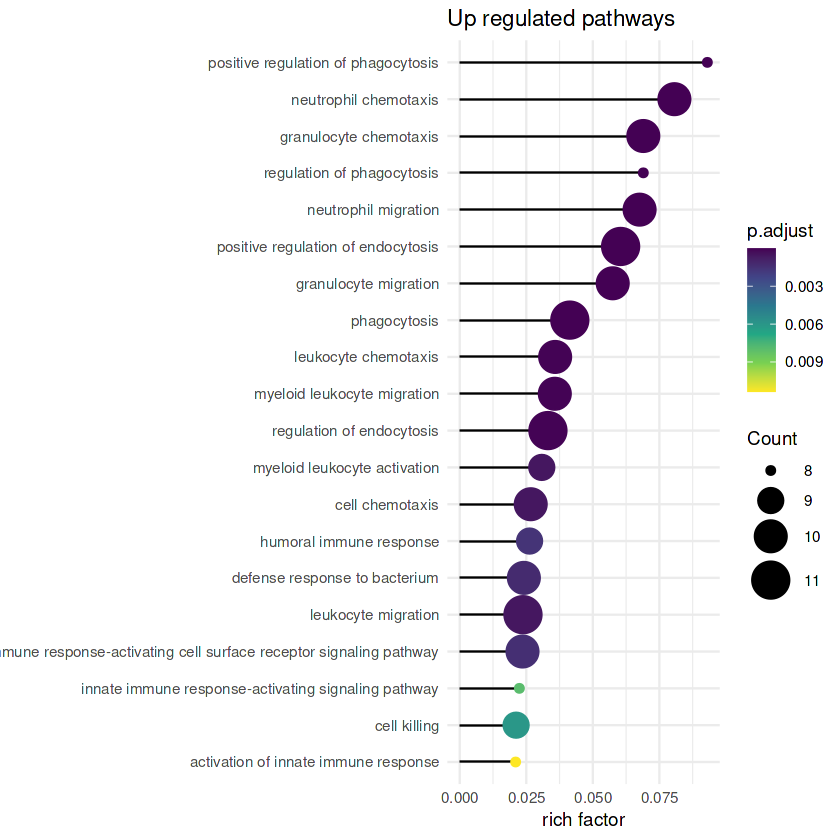

In [216]:
library(forcats)
library(enrichplot)

ggplot(y, showCategory = 20, 
  aes(richFactor, fct_reorder(Description, richFactor))) + 
  geom_segment(aes(xend=0, yend = Description)) +
  geom_point(aes(color=p.adjust, size = Count)) +
  scale_color_viridis_c(guide=guide_colorbar(reverse=TRUE)) +
  scale_size_continuous(range=c(2, 10)) +
  theme_minimal() + 
  xlab("rich factor") +
  ylab(NULL) + 
  ggtitle("Up regulated pathways")

## visualization of down-regulation genes genes

In [208]:
modified_result_down<- filter(GO_result_down, p.adjust < .05, qvalue < 0.2)# filtering pathways

In [209]:
modified_result_down= mutate(modified_result_down, geneRatio = parse_ratio(GeneRatio)) %>% #converting to numeric value ratio
  arrange(desc(geneRatio))# sorting the dataframe

In [210]:
# k/M
# Calculate richFactor by dividing Count by the numerator of BgRatio
y_ <- mutate(modified_result_down, richFactor = Count / as.numeric(sub("/\\d+", "", BgRatio)))
y_

#
# over-representation test
#
#...@organism 	 Homo sapiens 
#...@ontology 	 BP 
#...@keytype 	 ENSEMBL 
#...@gene 	 chr [1:1304] "ENSG00000000971" "ENSG00000002822" "ENSG00000003756" ...
#...pvalues adjusted by 'BH' with cutoff <0.05 
#...21 enriched terms found
'data.frame':	21 obs. of  14 variables:
 $ ID            : chr  "GO:0007018" "GO:0065004" "GO:0051235" "GO:0034728" ...
 $ Description   : chr  "microtubule-based movement" "protein-DNA complex assembly" "maintenance of location" "nucleosome organization" ...
 $ GeneRatio     : chr  "35/594" "24/594" "23/594" "22/594" ...
 $ BgRatio       : chr  "449/21288" "273/21288" "358/21288" "160/21288" ...
 $ RichFactor    : num  0.078 0.0879 0.0642 0.1375 0.1522 ...
 $ FoldEnrichment: num  2.79 3.15 2.3 4.93 5.45 ...
 $ zScore        : num  6.51 6.06 4.21 8.45 8.89 ...
 $ pvalue        : num  5.16e-08 7.99e-07 1.99e-04 7.24e-10 2.62e-10 ...
 $ p.adjust      : num  5.02e-05 3.88e-04 3.68e-02 9.39e-07 5.09e-07 ...
 $ qvalue        : num 

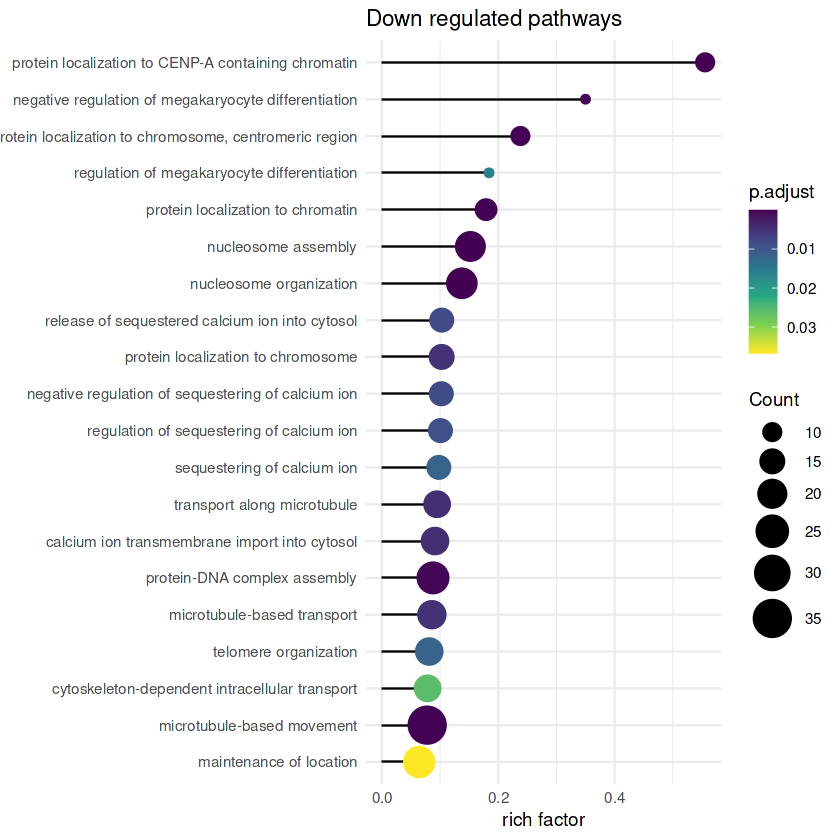

In [215]:
ggplot(y_, showCategory = 20, 
  aes(richFactor, fct_reorder(Description, richFactor))) + 
  geom_segment(aes(xend=0, yend = Description)) +
  geom_point(aes(color=p.adjust, size = Count)) +
  scale_color_viridis_c(guide=guide_colorbar(reverse=TRUE)) +
  scale_size_continuous(range=c(2, 10)) +
  theme_minimal() + 
  xlab("rich factor") +
  ylab(NULL) + 
  ggtitle("Down regulated pathways")